In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
epochs = 50 # iterations over dataset

In [ ]:
img_rows, img_cols = 32, 32

In [ ]:
#Channels first means that in a specific tensor (consider a photo), you would have (Number_Of_Channels, Height , Width).
# we convert channel first to channel last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
inputs = Input(shape=(32, 32, 3))
num_filters = 32
t = Conv2D(kernel_size=2,strides=1,filters=num_filters,padding="same")(inputs)
t = ReLU()(t)

t = Conv2D(kernel_size = (2,2),strides=1,filters = 32, padding = "same")(t)
y = ReLU()(t)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 32, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,t])
z1 = ReLU()(y)

z1 = Conv2D(kernel_size = (3,3),strides=1,filters = 32, padding = "same")(z1)
y = ReLU()(z1)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 32, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
#y = Dropout(0.5)(y)
y = Add()([y,z1])
z2 = ReLU()(y)

z2 = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(z2)
y = ReLU()(z2)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z2])
z3 = ReLU()(y)

z3 = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(z3)
y = ReLU()(z3)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
#y = Dropout(0.5)(y)
y = Add()([y,z3])
z4 = ReLU()(y)

z4 = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(z4)
y = ReLU()(z4)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z4])
z5 = ReLU()(y)

z5 = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(z5)
y = ReLU()(z5)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z5])
z6 = ReLU()(y)

z6 = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(z6)
y = ReLU()(z6)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
#y = Dropout(0.5)(y)
y = Add()([y,z6])
z7 = ReLU()(y)

z7 = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(z5)
y = ReLU()(z7)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z7])
z8 = ReLU()(y)

t = AveragePooling2D(4)(z8)
t = Flatten()(t)

outputs = Dense(100, activation='softmax')(t)




In [ ]:
model = Model(inputs, outputs)
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 32, 32, 32)   416         input_4[0][0]                    
__________________________________________________________________________________________________
re_lu_51 (ReLU)                 (None, 32, 32, 32)   0           conv2d_51[0][0]                  
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 32, 32, 32)   4128        re_lu_51[0][0]                   
_______________________________________________________________________________________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9),
              metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# save model after each epoch
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint("ResNet_SGD_dropout.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)
#hist=model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test),callbacks=[early, checkpoint])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=80, validation_data=(x_test, y_test),callbacks=[early,checkpoint])

Epoch 1/80
391/390 [==============================] - ETA: 0s - loss: 4.1907 - accuracy: 0.0645
Epoch 00001: val_accuracy improved from -inf to 0.10610, saving model to ResNet_SGD_dropout.hdf5
391/390 [==============================] - 54s 138ms/step - loss: 4.1907 - accuracy: 0.0645 - val_loss: 3.9617 - val_accuracy: 0.1061
Epoch 2/80
391/390 [==============================] - ETA: 0s - loss: 3.7295 - accuracy: 0.1356
Epoch 00002: val_accuracy improved from 0.10610 to 0.15970, saving model to ResNet_SGD_dropout.hdf5
391/390 [==============================] - 54s 138ms/step - loss: 3.7295 - accuracy: 0.1356 - val_loss: 3.6520 - val_accuracy: 0.1597
Epoch 3/80
391/390 [==============================] - ETA: 0s - loss: 3.4244 - accuracy: 0.1873
Epoch 00003: val_accuracy improved from 0.15970 to 0.21950, saving model to ResNet_SGD_dropout.hdf5
391/390 [==============================] - 54s 138ms/step - loss: 3.4244 - accuracy: 0.1873 - val_loss: 3.2712 - val_accuracy: 0.2195
Epoch 4/80
39

In [ ]:
# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
#confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.5845594954864525
Recall: 0.57
Accuracy: 0.57


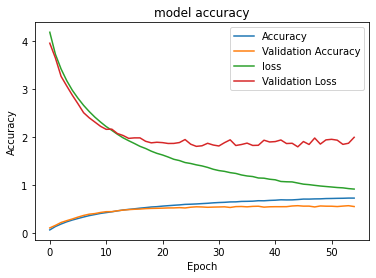

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(32, 32, 3))
num_filters = 32
t = Conv2D(kernel_size=2,strides=1,filters=num_filters,padding="same")(inputs)
t = ReLU()(t)

t = Conv2D(kernel_size = (2,2),strides=1,filters = 32, padding = "same")(t)
y = ReLU()(t)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 32, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,t])
z1 = ReLU()(y)

z1 = Conv2D(kernel_size = (3,3),strides=1,filters = 32, padding = "same")(z1)
y = ReLU()(z1)
y = Conv2D(kernel_size = (3,3),strides=1,filters = 32, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
#y = Dropout(0.5)(y)
y = Add()([y,z1])
z2 = ReLU()(y)

z2 = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(z2)
y = ReLU()(z2)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z2])
z3 = ReLU()(y)

z3 = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(z3)
y = ReLU()(z3)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 64, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
#y = Dropout(0.5)(y)
y = Add()([y,z3])
z4 = ReLU()(y)

z4 = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(z4)
y = ReLU()(z4)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z4])
z5 = ReLU()(y)

z5 = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(z5)
y = ReLU()(z5)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 128, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z5])
z6 = ReLU()(y)

z6 = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(z6)
y = ReLU()(z6)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
#y = Dropout(0.5)(y)
y = Add()([y,z6])
z7 = ReLU()(y)

z7 = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(z5)
y = ReLU()(z7)
y = Conv2D(kernel_size = (2,2),strides=1,filters = 256, padding = "same")(y)
y = MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(y)
y = Dropout(0.5)(y)
y = Add()([y,z7])
z8 = ReLU()(y)

t = AveragePooling2D(4)(z8)
t = Flatten()(t)

outputs = Dense(100, activation='softmax')(t)

model = Model(inputs, outputs)

model.load_weights('../weights/ResNet_SGD_With_DropOut.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

